In [5]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from suaBibSignal import *
import peakutils
import math

In [6]:
def generate_audio_file(filename):
        sample_rate = 44100
        duration = 4
        frequency_1, frequency_2 = (1336, 697)

        time_series = np.linspace(0, duration, int(
            sample_rate * duration), endpoint=False)

        amplitude = 1
        signal_1 = amplitude * np.sin(2 * np.pi * frequency_1 * time_series)
        signal_2 = amplitude * np.sin(2 * np.pi * frequency_2 * time_series)

        combined_signal = signal_1 + signal_2

        # Save the generated audio to a WAV file
        wavfile.write(filename, sample_rate,
                      combined_signal.astype(np.float32))
generate_audio_file("initialAudio.wav")

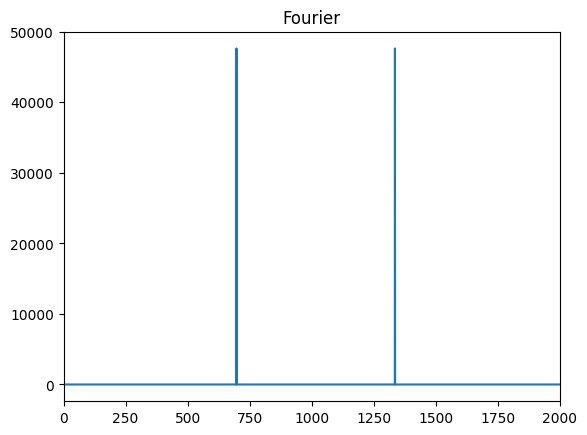

In [7]:
samplerate, data = wavfile.read('initialAudio.wav')
signal = signalMeu() 
xf, yf = signal.calcFFT(data, 44100)
signal.plotFFT(data, 44100)

In [10]:
index = peakutils.indexes(yf, thres=0.4, min_dist=20)
print(f"Picos: {[xf[i] for i in index]}")

Picos: [697.0079025839295, 1336.0151475640314]


Picos: [697.0079025839295, 1336.0151475640314]
Amplitude dos picos: [47627.76999434648, 47627.7699986885]


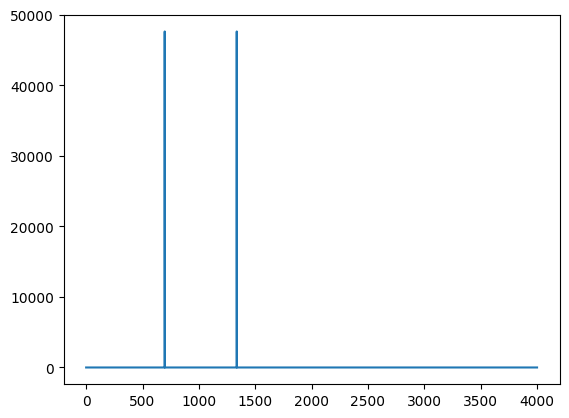

In [11]:
# Remove frequencies higher than 4000
xf_limpo = []
yf_limpo = []
contador = 0
for frequency in xf:
    if frequency<4000:
        xf_limpo.append(frequency)
        yf_limpo.append(yf[contador])
    contador +=1
    
# plot new fourier transform with frequencies below 4000
plt.plot(xf_limpo,yf_limpo)
index = peakutils.indexes(yf, thres=0.4, min_dist=20)
print(f"Picos: {[xf_limpo[i] for i in index]}")
print(f"Amplitude dos picos: {[yf_limpo[i] for i in index]}")

In [12]:
import math

def inverse_fourier_transform(amplitudes, frequencies, sample_rate, duration):
    N = len(amplitudes)
    time_values = [i / sample_rate for i in range(int(sample_rate * duration))]
    signal = [0] * len(time_values)

    for n in range(N):
        for t_index, t in enumerate(time_values):
            signal[t_index] += amplitudes[n] * math.cos(2 * math.pi * frequencies[n] * t)

    return time_values, signal

# Example usage
AMPLITUDES = [yf_limpo[i] for i in index]  # List of amplitudes
FREQUENCIES = [xf_limpo[i] for i in index]  # List of corresponding frequencies in Hz
sample_rate = 44100  # Sample rate in Hz
duration = 4  # Duration of the audio in seconds

time_values, signal = inverse_fourier_transform(AMPLITUDES, FREQUENCIES, sample_rate, duration)

# Now, 'time_values' contains the time values, and 'signal' contains the reconstructed time-domain signal.


In [13]:
# Run audio file to check lower quality
wavfile.write("lessThan4000.wav", 44100,np.array(signal))

In [14]:
time = 4 # seconds
fc = 14000
carrierAmplitude = 1
sample_rate = 44100

n_measurements = 44100*time

time_vector = np.linspace(0, time, n_measurements)

carrier_vector = []
for t in time_vector:
    carrier_vector.append(carrierAmplitude*math.sin(2*math.pi*fc*t))


In [15]:
wavfile.write("carrierSignal.wav", 44100,np.array(carrier_vector))

In [16]:
AM_signal = []
contador = 0
for point in carrier_vector:
    AM_signal.append(point+point*signal[contador])
    contador+=1

In [17]:
wavfile.write("AMsignal.wav", 44100,np.array(AM_signal))

In [18]:
maximum = max(AM_signal)
minimum = min(AM_signal)
print(maximum, minimum)

k = 1/maximum

normalized_AM = [point*k for point in AM_signal]
wavfile.write("normalizedAM.wav", 44100,np.array(normalized_AM))

95115.33205086755 -95196.01798257059


In [ ]:
# ------------------------ RECEBIMENTO DO SINAL -----------------

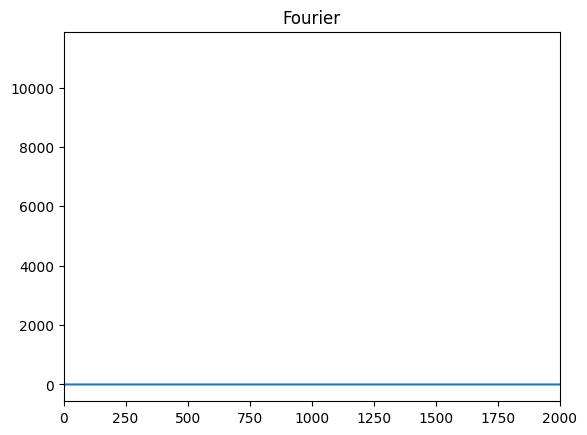

In [19]:
s = signalMeu() 
xf, yf = s.calcFFT(normalized_AM, 44100)
s.plotFFT(normalized_AM, 44100)

In [20]:
index = peakutils.indexes(yf, thres=0.4, min_dist=20)
print(f"Frequências de Pico: {[xf[i] for i in index]}")

Frequências de Pico: [12664.143584394382, 13303.150829374483, 14697.166634542342, 15336.173879522445]
